# Classification

Load the data and explore them, showing size, structure and histograms of numeric data; sho the histogram of the frequencies of the class labels, contained in the "language" column.

In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [165]:
url = './exam2022_01_13_copia.csv'
df = pd.read_csv(url)

df.head()

language         X1        X2        X3         X4        X5         X6  \
0       ES   7.071476 -6.512900  7.650800  11.150783 -7.657312  12.484021   
1       ES  10.982967 -5.157445  3.952060  11.529381 -7.638047  12.136098   
2       ES   7.827108 -5.477472  7.816257   9.187592 -7.172511  11.715299   
3       ES   6.744083 -5.688920  6.546789   9.000183 -6.924963  11.710766   
4       ES   5.836843 -5.326557  7.472265   8.847440 -6.773244  12.677218   

          X7        X8        X9       X10       X11       X12  
0 -11.709772  3.426596  1.462715 -2.812753  0.866538 -5.244274  
1 -12.036247  3.491943  0.595441 -4.508811  2.332147 -6.221857  
2 -13.847214  4.574075 -1.687559 -7.204041 -0.011847 -6.463144  
3 -12.374388  6.169879 -0.544747 -6.019237  1.358559 -6.356441  
4 -12.315061  4.416344  0.193500 -3.644812  2.151239 -6.816310

In [166]:
df.describe(include='all')

language          X1          X2          X3          X4          X5  \
count       329  329.000000  329.000000  329.000000  329.000000  329.000000   
unique        6         NaN         NaN         NaN         NaN         NaN   
top          US         NaN         NaN         NaN         NaN         NaN   
freq        165         NaN         NaN         NaN         NaN         NaN   
mean        NaN    5.645227   -4.270814    2.635319    7.200207   -5.648733   
std         NaN    5.105302    3.514350    3.635323    4.310095    4.596180   
min         NaN   -6.067831  -14.972962   -6.186583   -8.844231  -15.656596   
25%         NaN    2.065603   -6.515764    0.137042    4.700874   -8.417684   
50%         NaN    4.954206   -4.252512    2.029268    7.804680   -6.786670   
75%         NaN    9.793648   -1.560250    4.178026   10.129165   -4.463308   
max         NaN   17.749851    3.570765   17.066487   16.178942    7.912809   

                X6          X7          X8          X9         X10  \
count   329.000000  329.000000  329.000000  329.000000  321.000000   
unique         NaN         NaN         NaN         NaN         NaN   
top            NaN         NaN         NaN         NaN         NaN   
freq           NaN         NaN         NaN         NaN         NaN   
mean      9.810236   -9.408053    5.117328   -1.229432   -2.411215   
std       3.624654    2.484117    2.650608    3.634849    5.027840   
min      -3.528964  -15.365665   -2.873862  -15.510974  -11.429178   
25%       8.643563  -11.120860    3.482167   -1.749082   -5.090180   
50%      10.379330   -9.710399    4.843103   -0.389970   -3.327718   
75%      11.784360   -7.989370    6.588931    0.779993   -1.512083   
max      21.445837   -0.424033   13.846083    4.789989   16.326455   

               X11         X12  
count   329.000000  329.000000  
unique         NaN         NaN  
top            NaN         NaN  
freq           NaN         NaN  
mean      2.430833   -3.980415  
std       3.478467    2.985879  
min     -13.664104  -13.724103  
25%       1.197789   -5.941409  
50%       3.169703   -4.374334  
75%       4.673452   -2.191658  
max       9.166066    5.259430

In [167]:
print("The dataframe has {} rows and {} columns".format(df.shape[0], df.shape[1]))

The dataframe has 329 rows and 13 columns


/opt/homebrew/Caskroom/miniconda/base/envs/MachineLearning/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniconda/base/envs/MachineLearning/lib/python3.13/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/homebrew/Caskroom/miniconda/base/envs/MachineLearning/lib/python3.13/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grou

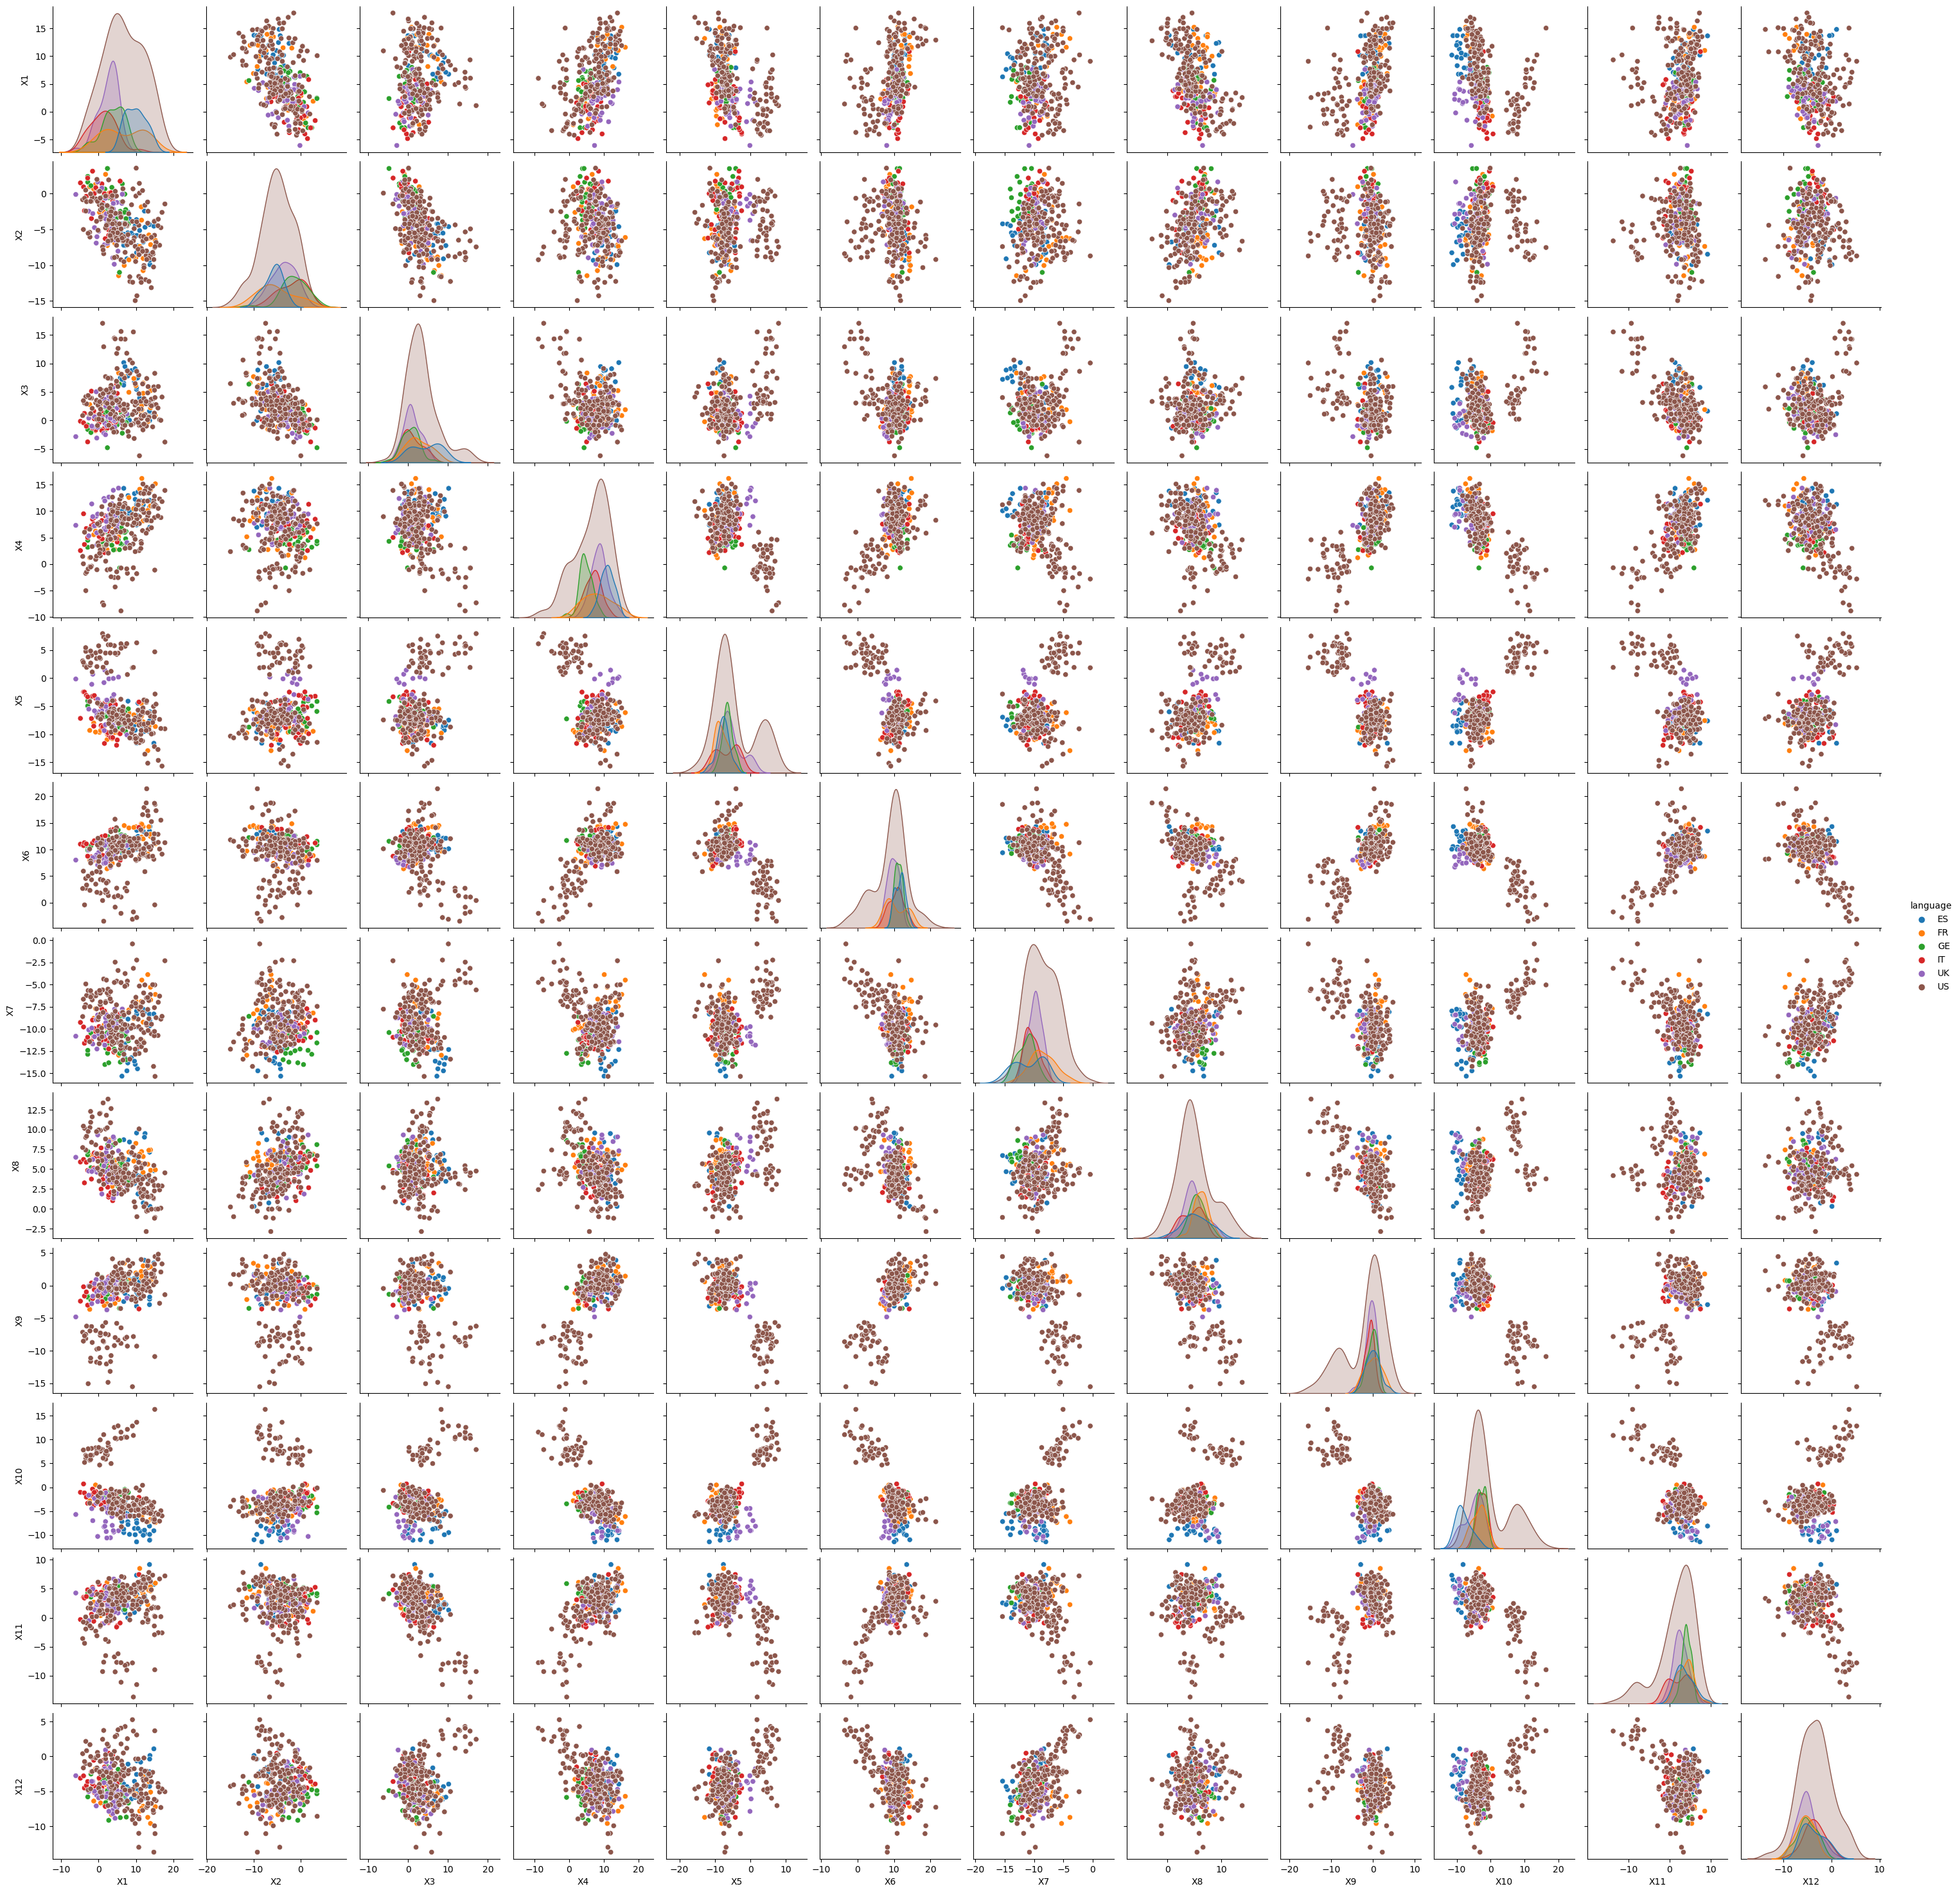

In [168]:
sns.pairplot(df, hue='language')

<Figure size 1500x1500 with 0 Axes>

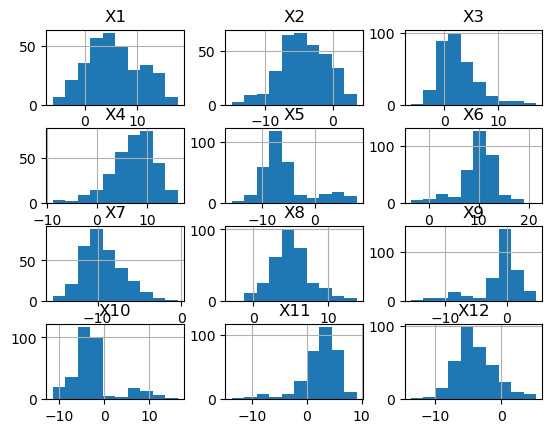

In [169]:
target = 'language'

# show histograms of numeric data
plt.figure(figsize=(15,15))
df.drop(columns=target).hist()
plt.show()

The values are pretty different from one another, so it might be useful rescale them by using MinMaxScaler

In [170]:
from sklearn.preprocessing import MinMaxScaler

df0 = df[target].copy()
df1 = df.drop(columns=target, axis=1)

mms = MinMaxScaler()
enc = mms.fit_transform(df1)
df_enc = pd.DataFrame(data=enc, columns=df1.columns)

df = df_enc.join(df0)
df.head()

X1        X2        X3        X4        X5        X6        X7  \
0  0.551662  0.456222  0.595078  0.799060  0.339393  0.641166  0.244678   
1  0.715888  0.529317  0.436013  0.814190  0.340210  0.627235  0.222828   
2  0.583388  0.512059  0.602193  0.720605  0.359962  0.610386  0.101626   
3  0.537916  0.500657  0.547600  0.713116  0.370465  0.610204  0.200197   
4  0.499825  0.520198  0.587400  0.707011  0.376902  0.648901  0.204168   

         X8        X9       X10       X11       X12 language  
0  0.376823  0.836103  0.310439  0.636467  0.446694       ES  
1  0.380731  0.793382  0.249332  0.700663  0.395198       ES  
2  0.445452  0.680924  0.152226  0.597992  0.382487       ES  
3  0.540895  0.737218  0.194913  0.658018  0.388108       ES  
4  0.436019  0.773583  0.280461  0.692739  0.363883       ES

<Figure size 1500x1500 with 0 Axes>

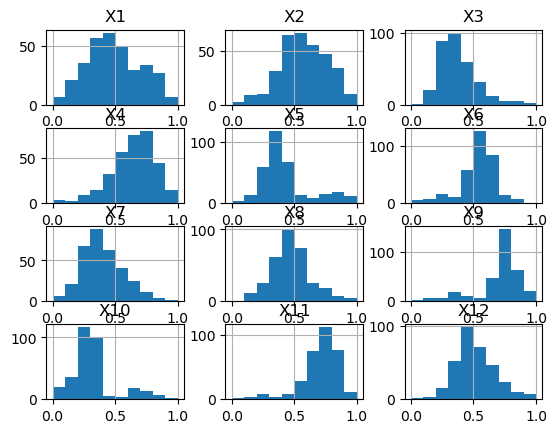

In [171]:
plt.figure(figsize=(15,15))
df.drop(columns=target).hist()
plt.show()

We can see that the dataframe has been rescaled in range (0,1)

/opt/homebrew/Caskroom/miniconda/base/envs/MachineLearning/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniconda/base/envs/MachineLearning/lib/python3.13/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/homebrew/Caskroom/miniconda/base/envs/MachineLearning/lib/python3.13/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grou

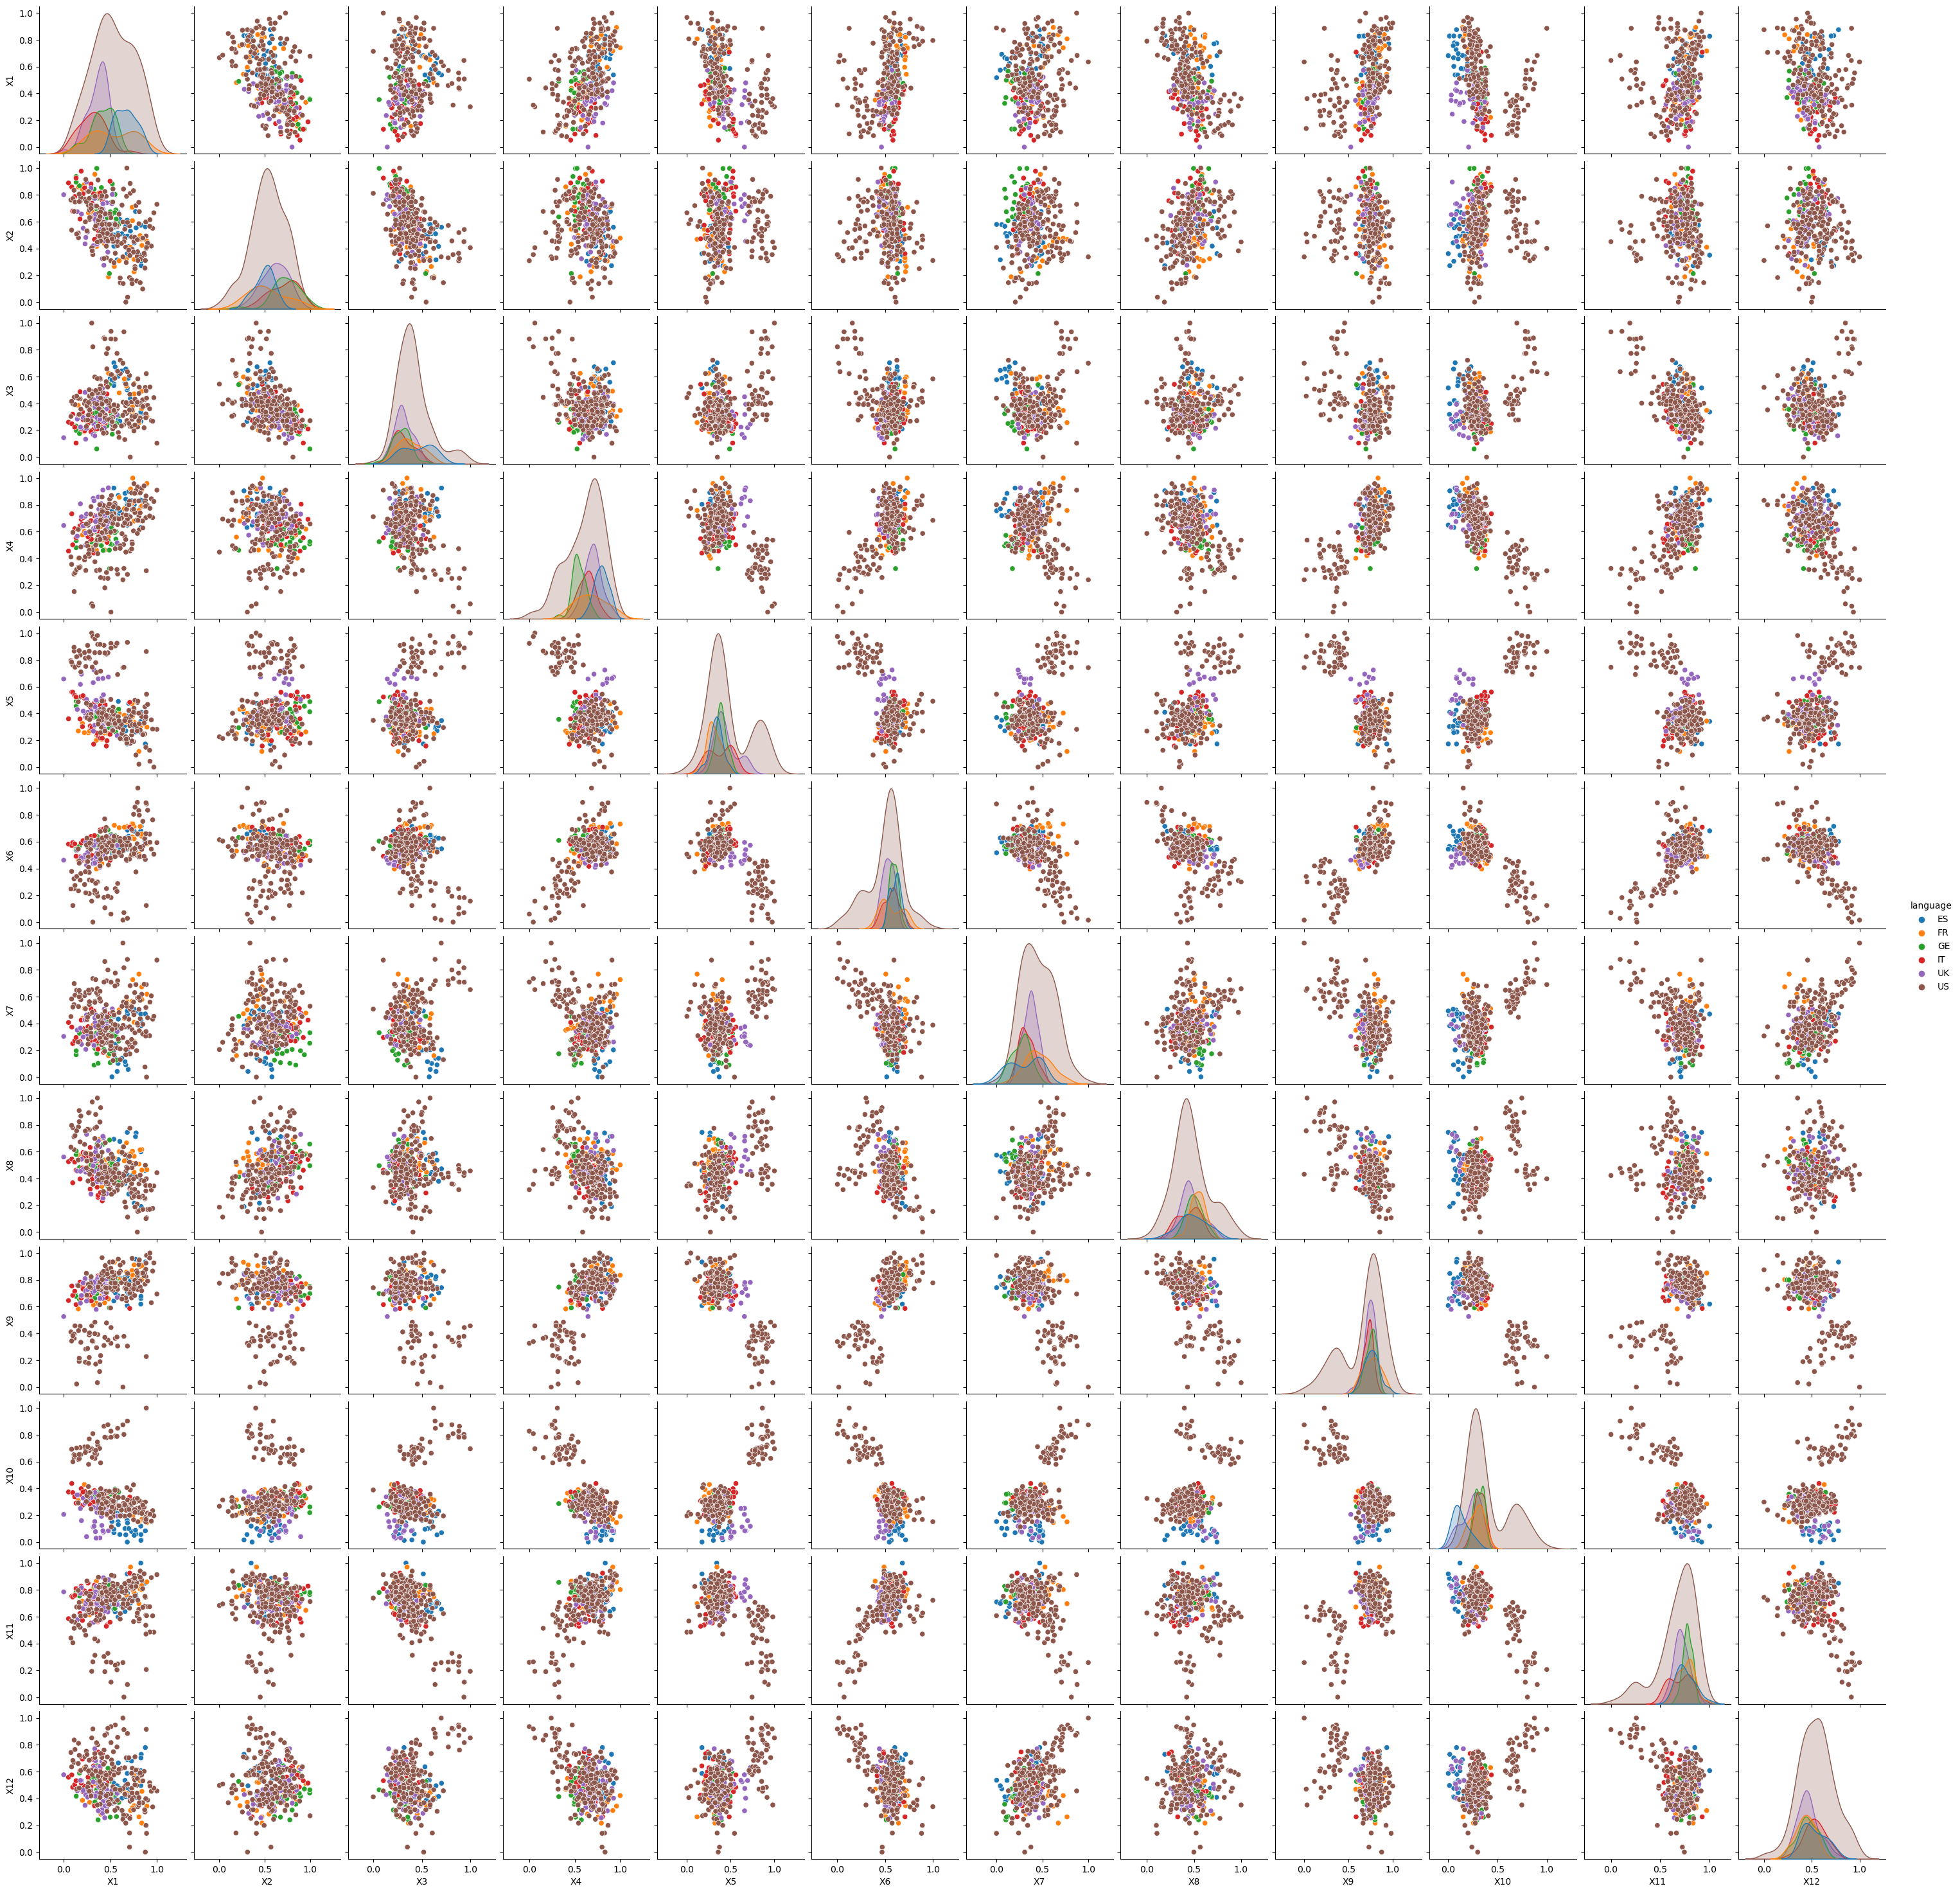

In [172]:
sns.pairplot(df, hue=target)

<Axes: xlabel='language'>

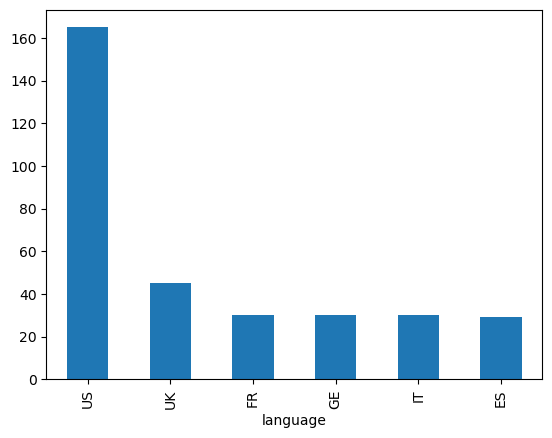

In [173]:
# show histogram of the frequencies of the class labels
df[target].value_counts().plot(kind='bar')

Drop the rows with NaN values, if any, show the shape of the dataset after this cleaning

In [174]:
null_rows_before = df.shape[0] - df.dropna().shape[0]
print("Number of NaN rows before cleaning: {}".format(null_rows_before))

Number of NaN rows before cleaning: 8


In [175]:
df = df.dropna()
null_rows_after = df.shape[0] - df.dropna().shape[0]
print("Number of NaN rows after cleaning: {}".format(null_rows_after))

if null_rows_after == 0:
    print("We have removed {} NaN rows, and the new shape is {} rows and {} columns".format(null_rows_before, df.shape[0], df.shape[1]))

Number of NaN rows after cleaning: 0
We have removed 8 NaN rows, and the new shape is 321 rows and 13 columns


Tune the hyper-parameters of Model1 with CrossValidation on the training set, optimize for recall_macro

In [176]:
# create X and y
X = df.drop(columns=target, axis=1)
y = df[target]

# create training and testing set
random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=random_state)

print("The training set has {} samples".format(X_train.shape[0]))
print("The testing set has {} samples".format(X_test.shape[0]))
print("The total number of features is {}".format(X_train.shape[1]))

The training set has 240 samples
The testing set has 81 samples
The total number of features is 12


In [177]:
# Model1 will be Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import ParameterGrid

# needed params
params_dt = {
                "max_depth": list(range(1,20)), 
                "class_weight": [None, 'balanced']
            }


# optimization score
score = 'recall_macro'

In [178]:
from sklearn.model_selection import GridSearchCV

model1 = DecisionTreeClassifier()
dt = GridSearchCV(estimator=model1, param_grid=params_dt, cv=5, scoring=score, n_jobs=2)

dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

best_hyper_params = dt.best_params_
best_score = dt.best_score_

print("The best parameters found are: {}".format(best_hyper_params))
print("The best score for recall is", best_score )


The best parameters found are: {'class_weight': None, 'max_depth': 16}
The best score for recall is 0.5932384403036577


Produce a classification report for Model1 on the test set

In [179]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

          ES       0.78      0.88      0.82         8
          FR       0.45      0.71      0.56         7
          GE       0.30      0.33      0.32         9
          IT       0.50      0.64      0.56        11
          UK       0.50      0.17      0.25         6
          US       0.80      0.70      0.75        40

    accuracy                           0.63        81
   macro avg       0.56      0.57      0.54        81
weighted avg       0.65      0.63      0.63        81



We notice that the accuracy is quite good, even though it is not too high. The worse classification performance are for the 'FR' and 'IT' labels.

Produce the confusion matrix for Model1 on the test set

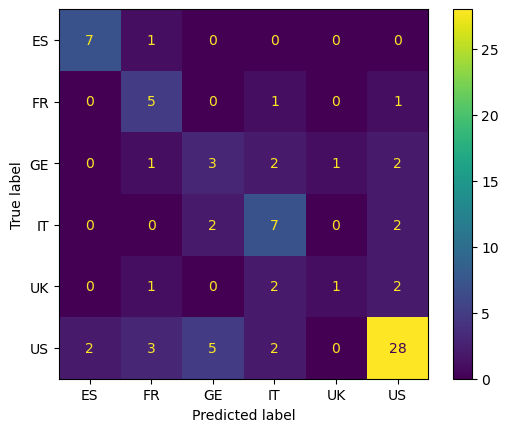

In [180]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_dt),
                              display_labels=np.unique(y_pred_dt))
disp.plot()
plt.show()

As i have already said, the US lables are the one that had the most correct prediction. Moreover, they were the most frequent in the "Language" column.

But in general, as we see from the main diagonal, the number of good predicion for each label is pretty good.

tune the hyper-parameters of Model2 with CrossValidation on the training set, optimize for recall_macro

In [181]:
# for Model2 i will use the KNearestNeighbors classifier
from sklearn.neighbors import KNeighborsClassifier

params_knn = {"n_neighbors": list(range(2,11))}

model2 = KNeighborsClassifier()

In [182]:
knn = GridSearchCV(estimator=model2, param_grid=params_knn, scoring=score, cv=5, n_jobs=2)
knn.fit(X_train, y_train)

best_hyper_params_knn = knn.best_params_
best_score_knn = knn.best_score_

y_pred_knn = knn.predict(X_test)

print("The best parameters found are: {}".format(best_hyper_params_knn))
print("The best score for recall is", best_score_knn)


The best parameters found are: {'n_neighbors': 2}
The best score for recall is 0.7475


In [183]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

          ES       0.64      0.88      0.74         8
          FR       0.60      0.86      0.71         7
          GE       0.47      1.00      0.64         9
          IT       1.00      0.55      0.71        11
          UK       0.50      0.50      0.50         6
          US       0.97      0.70      0.81        40

    accuracy                           0.73        81
   macro avg       0.70      0.75      0.68        81
weighted avg       0.82      0.73      0.74        81



The KNN classifier is way better than the DecisionTree classifier, as we can see from the precision, recall, f1-score values.

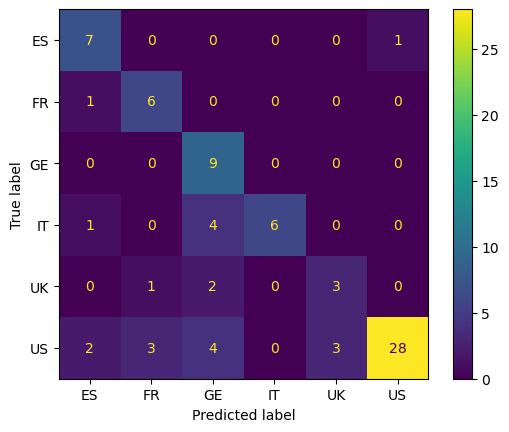

In [184]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_knn), display_labels=np.unique(y_pred_knn))
disp.plot()
plt.show()

As we can see, the KNN's performances are better than the DT's ones, specially for the 'IT' and 'FR' labels.